# Stochastic Gradient Descent

## Theoretical Aspects

The dot product need to compute $\nabla E_\text{in}(w)$ has some importanta drawbacks in terms of computational complexity.
Let's assume we have a million points with 100.000 features each. The resulting matrix would have $10^{6} \times 10^{5}$ elements, which is a huge number. The dot product would have a complexity of $O(n^2)$, which is not feasible for this case.
Do we really need to compute the dot product to get the gradient? The answer is no. We can compute the gradient using only one point at a time. This is the idea behind the Stochastic Gradient Descent (SGD) algorithm.
We sample $n <N$ points from the dataset and compute the gradient using only these points, which makes the approach computationally feasible. We can also escape saddle points( or the local minima) because we move in a more random way than the traditional gradient descent.
Using this approach we intentionally add noise when we compute the absolute minimum of the error function. This noise can help us to escape from the local minima and find the global minimum.


## Implementation

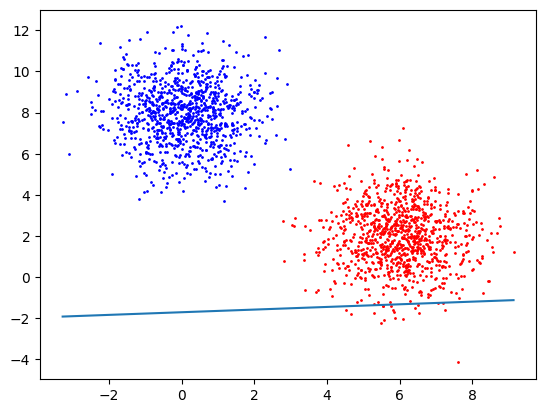

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(314)

N = 1000

# Generate random data
x11 = np.random.normal(loc=6, scale = 1, size = N)
x12 = np.random.normal(loc=2, scale = 1.5, size = N)
y1 = np.ones(N)

plt.scatter(x11, x12, color='red', s=1)

x21 = np.random.normal(loc=0, scale = 1, size = N)
x22 = np.random.normal(loc=8, scale = 1.5, size = N)
y2 = -np.ones(N)

plt.scatter(x21, x22, color='blue', s=1)


w = np.random.normal(loc = 0.1, size = 3)

plt.plot(
  [np.min(x21), np.max(x11)],
  [np.min(x21) * -w[1]/w[2] -w[0]/w[2], np.max(x21) * -w[1]/w[2] -w[0]/w[2]],
)


x0 = np.ones(2*N)
x1 = np.concatenate((x11, x21))
x2 = np.concatenate((x12, x22))
x = np.array([x0, x1, x2]).T

y = np.concatenate((y1, y2))

### Error function
The error function is the same as the basic gradient descent: Sum of Squared Errors (SSE).

$$
\frac{1}{2} \sum_{n=1}^{N} (e_i)^2
$$

### Training Stage

The stochastic approach require a *mini-match*, which is the number of samples to evaluate from the original dataset. 
WE define a the `batch_size` parameter to control the number of samples to evaluate. The algorithm will evaluate the gradient using only the samples in the mini-batch.
During the training phase, it's suggested to shuffle the dataset during each epoch, which helps removing the bias from the dataset.

In [13]:
eta = 1e-4
batch_size = 10
max_epoch = 500
current_epoch = 0

sse_epoch = np.zeros(max_epoch)

while current_epoch < max_epoch:
  output = np.dot(x, w)
  errors = y - output
  
  sse_epoch[current_epoch] = np.sum(np.square(errors)) / 2
  
  random_permutation = np.random.permutation(range(y.size))
  x = x[random_permutation,:]
  y = y[random_permutation]
  
  for i in range(0, y.size, batch_size):
    x_batch = x[i:i+batch_size:]
    y_batch = y[i:i+batch_size]
    
  
    w += (2/batch_size) * eta * np.dot(x_batch.T, y_batch - np.dot(x_batch, w))
  current_epoch += 1

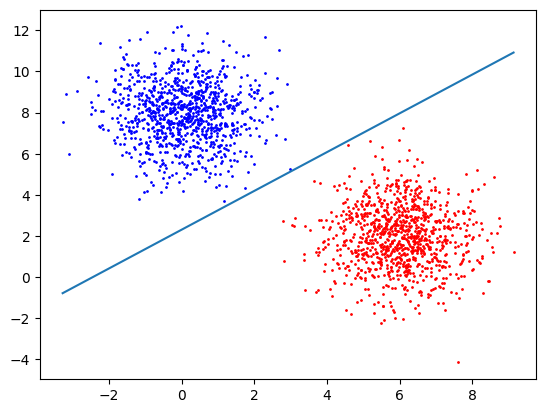

In [16]:
plt.scatter(x11, x12, color='red', s=1)
plt.scatter(x21, x22, color='blue', s=1)

plt.plot(
  [np.min(x1), np.max(x1)],
  [np.min(x1) * -w[1]/w[2] -w[0]/w[2], np.max(x1) * -w[1]/w[2] -w[0]/w[2]],
)

[89.26093947 89.24912021 89.17582884 89.13060596 89.06974329 89.01939585
 88.97047557 88.92271735 88.89336935 88.83735468]


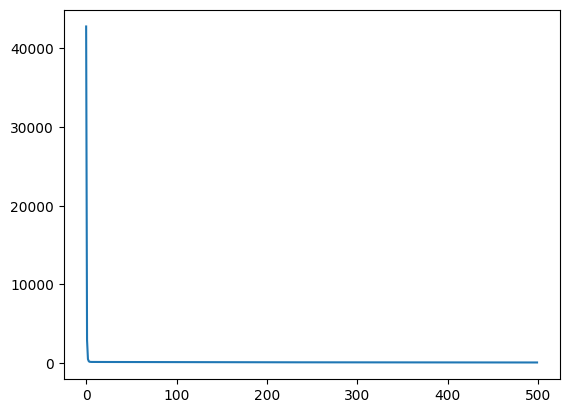

In [17]:
print(sse_epoch[-10:])

plt.plot(range(max_epoch), sse_epoch)